In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
from tensorflow_core.python.keras.wrappers.scikit_learn import KerasClassifier
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
data= pd.read_csv('../min_max_norm.csv')

### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### Neural Network

In [5]:
## ANN Model
def create_model(optimizer):
    model = Sequential()
	#Layer 1
    model.add(Dense(20, activation='relu', input_dim=20))
    model.add(Dropout(0.3))
    #Layer 2
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    
    # output layer
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN = KerasClassifier(build_fn=create_model)
params={'optimizer' : ['adam', 'rmsprop'],
        'batch_size': [128, 256, 512, 800]}

In [7]:
##accuracy
grid_search_acc= GridSearchCV(estimator=ANN, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_acc.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 4s 88us/sample - loss: 0.5707 - accuracy: 0.7164 - val_loss: 0.5022 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 2s 54us/sample - loss: 0.4879 - accuracy: 0.7836 - val_loss: 0.4398 - val_accuracy: 0.8009
Epoch 3/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4486 - accuracy: 0.8018 - val_loss: 0.4269 - val_accuracy: 0.8009
Epoch 4/300
42845/42845 [==============================] - 2s 55us/sample - loss: 0.4354 - accuracy: 0.8056 - val_loss: 0.4258 - val_accuracy: 0.8009
Epoch 5/300
42845/42845 [==============================] - 2s 46us/sample - loss: 0.4287 - accuracy: 0.8063 - val_loss: 0.4256 - val_accuracy: 0.8009
Epoch 6/300
42845/42845 [==============================] - 2s 48us/sample - loss: 0.4263 - accuracy: 0.8067 - val_loss: 0.4253 - val_accuracy: 0.8009
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 3s 59us/sample - loss: 0.4192 - accuracy: 0.8070 - val_loss: 0.4228 - val_accuracy: 0.8009
Epoch 56/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.4187 - accuracy: 0.8070 - val_loss: 0.4230 - val_accuracy: 0.8007
Epoch 57/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4203 - accuracy: 0.8070 - val_loss: 0.4231 - val_accuracy: 0.8009
Epoch 58/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.4195 - accuracy: 0.8068 - val_loss: 0.4232 - val_accuracy: 0.8008
Epoch 59/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4199 - accuracy: 0.8070 - val_loss: 0.4231 - val_accuracy: 0.8009
Epoch 60/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4190 - accuracy: 0.8062 - val_loss: 0.4229 - val_accuracy: 0.8008
Epoch 61/300
42845/42845 [==============================] - 2s 52us/sample - loss: 0.4195 - ac

42845/42845 [==============================] - 2s 46us/sample - loss: 0.4189 - accuracy: 0.8068 - val_loss: 0.4222 - val_accuracy: 0.8009
Epoch 110/300
42845/42845 [==============================] - 2s 40us/sample - loss: 0.4205 - accuracy: 0.8065 - val_loss: 0.4223 - val_accuracy: 0.8009
Epoch 111/300
42845/42845 [==============================] - 2s 40us/sample - loss: 0.4196 - accuracy: 0.8068 - val_loss: 0.4219 - val_accuracy: 0.8009
Epoch 112/300
42845/42845 [==============================] - 2s 50us/sample - loss: 0.4196 - accuracy: 0.8063 - val_loss: 0.4218 - val_accuracy: 0.8009
Epoch 113/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4193 - accuracy: 0.8067 - val_loss: 0.4217 - val_accuracy: 0.8009
Epoch 114/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.4193 - accuracy: 0.8066 - val_loss: 0.4213 - val_accuracy: 0.8008
Epoch 115/300
42845/42845 [==============================] - 2s 52us/sample - loss: 0.4192 - accuracy:

Epoch 163/300
42845/42845 [==============================] - 2s 52us/sample - loss: 0.4178 - accuracy: 0.8065 - val_loss: 0.4222 - val_accuracy: 0.8008
Epoch 164/300
42845/42845 [==============================] - 2s 41us/sample - loss: 0.4184 - accuracy: 0.8066 - val_loss: 0.4220 - val_accuracy: 0.8008
Epoch 165/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.4183 - accuracy: 0.8072 - val_loss: 0.4226 - val_accuracy: 0.8007
Epoch 166/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4181 - accuracy: 0.8064 - val_loss: 0.4219 - val_accuracy: 0.8008
Epoch 167/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.4187 - accuracy: 0.8070 - val_loss: 0.4214 - val_accuracy: 0.8008
Epoch 168/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4185 - accuracy: 0.8066 - val_loss: 0.4211 - val_accuracy: 0.8008
Epoch 169/300
42845/42845 [==============================] - 2s 53us/sample - loss: 0.41

Epoch 217/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4183 - accuracy: 0.8071 - val_loss: 0.4214 - val_accuracy: 0.8007
Epoch 218/300
42845/42845 [==============================] - 2s 57us/sample - loss: 0.4182 - accuracy: 0.8077 - val_loss: 0.4214 - val_accuracy: 0.8008
Epoch 219/300
42845/42845 [==============================] - 2s 53us/sample - loss: 0.4189 - accuracy: 0.8064 - val_loss: 0.4220 - val_accuracy: 0.8007
Epoch 220/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.4197 - accuracy: 0.8065 - val_loss: 0.4217 - val_accuracy: 0.8008
Epoch 221/300
42845/42845 [==============================] - 2s 50us/sample - loss: 0.4193 - accuracy: 0.8072 - val_loss: 0.4214 - val_accuracy: 0.8007
Epoch 222/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4185 - accuracy: 0.8066 - val_loss: 0.4214 - val_accuracy: 0.8008
Epoch 223/300
42845/42845 [==============================] - 3s 59us/sample - loss: 0.41

In [8]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'batch_size': 128, 'optimizer': 'rmsprop'}
----------
[[ 1298  3654]
 [    3 13408]]
----------
              precision    recall  f1-score   support

           0       1.00      0.26      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.75     18363

----------


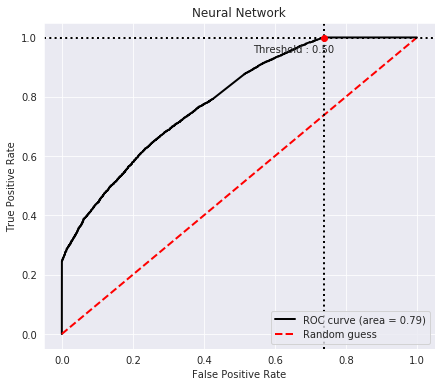

In [9]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Neural Network')
plt.show()

In [10]:
early_stop_rec = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec = KerasClassifier(build_fn=create_model)

In [11]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=ANN_rec, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_rec])
y_predict= grid_search_rec.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 1s 35us/sample - loss: 0.5877 - accuracy: 0.7325 - val_loss: 0.5517 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 1s 16us/sample - loss: 0.5540 - accuracy: 0.7366 - val_loss: 0.5208 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.5306 - accuracy: 0.7373 - val_loss: 0.5005 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.5135 - accuracy: 0.7392 - val_loss: 0.4893 - val_accuracy: 0.7305
Epoch 5/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.5018 - accuracy: 0.7463 - val_loss: 0.4814 - val_accuracy: 0.7470
Epoch 6/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4948 - accuracy: 0.7620 - val_loss: 0.4754 - val_accuracy: 0.7955
Epoch 7/300
42845/42845 [============================

42845/42845 [==============================] - 0s 7us/sample - loss: 0.4269 - accuracy: 0.8007 - val_loss: 0.4241 - val_accuracy: 0.8008
Epoch 55/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4266 - accuracy: 0.8008 - val_loss: 0.4242 - val_accuracy: 0.8008
Epoch 56/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4266 - accuracy: 0.8006 - val_loss: 0.4242 - val_accuracy: 0.8008
Epoch 57/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4269 - accuracy: 0.8009 - val_loss: 0.4242 - val_accuracy: 0.8008
Epoch 58/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4271 - accuracy: 0.8006 - val_loss: 0.4242 - val_accuracy: 0.8008
Epoch 59/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4274 - accuracy: 0.8001 - val_loss: 0.4241 - val_accuracy: 0.8007
Epoch 60/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4277 - accuracy: 0.8000 - va

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4245 - accuracy: 0.8011 - val_loss: 0.4231 - val_accuracy: 0.8010
Epoch 109/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4253 - accuracy: 0.8004 - val_loss: 0.4231 - val_accuracy: 0.8011
Epoch 110/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4251 - accuracy: 0.8006 - val_loss: 0.4232 - val_accuracy: 0.8011
Epoch 111/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4242 - accuracy: 0.8016 - val_loss: 0.4229 - val_accuracy: 0.8009
Epoch 112/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4247 - accuracy: 0.8013 - val_loss: 0.4234 - val_accuracy: 0.8011
Epoch 113/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4249 - accuracy: 0.8011 - val_loss: 0.4229 - val_accuracy: 0.8009
Epoch 114/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4242 - accuracy: 0.8011

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4245 - accuracy: 0.8009 - val_loss: 0.4222 - val_accuracy: 0.8008
Epoch 163/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4232 - accuracy: 0.8011 - val_loss: 0.4228 - val_accuracy: 0.8009
Epoch 164/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4247 - accuracy: 0.8003 - val_loss: 0.4221 - val_accuracy: 0.8010
Epoch 165/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4240 - accuracy: 0.8006 - val_loss: 0.4221 - val_accuracy: 0.8007
Epoch 166/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4233 - accuracy: 0.8010 - val_loss: 0.4222 - val_accuracy: 0.8008
Epoch 167/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4235 - accuracy: 0.8005 - val_loss: 0.4217 - val_accuracy: 0.8009
Epoch 168/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4234 - accuracy: 0.8009

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4226 - accuracy: 0.8009 - val_loss: 0.4214 - val_accuracy: 0.8010
Epoch 217/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4221 - accuracy: 0.8012 - val_loss: 0.4210 - val_accuracy: 0.8008
Epoch 218/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4228 - accuracy: 0.8010 - val_loss: 0.4212 - val_accuracy: 0.8007
Epoch 219/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4218 - accuracy: 0.8014 - val_loss: 0.4213 - val_accuracy: 0.8008
Epoch 220/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4227 - accuracy: 0.8004 - val_loss: 0.4209 - val_accuracy: 0.8011
Epoch 221/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4229 - accuracy: 0.8008 - val_loss: 0.4209 - val_accuracy: 0.8010
Epoch 222/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4224 - accuracy: 0.8

Epoch 270/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4220 - accuracy: 0.8010 - val_loss: 0.4205 - val_accuracy: 0.8009
Epoch 271/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4212 - accuracy: 0.8006 - val_loss: 0.4204 - val_accuracy: 0.8007
Epoch 272/300
42845/42845 [==============================] - 0s 6us/sample - loss: 0.4218 - accuracy: 0.8011 - val_loss: 0.4204 - val_accuracy: 0.8008
Epoch 273/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4214 - accuracy: 0.8013 - val_loss: 0.4201 - val_accuracy: 0.8008
Epoch 274/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4221 - accuracy: 0.8010 - val_loss: 0.4202 - val_accuracy: 0.8007
Epoch 275/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4211 - accuracy: 0.8016 - val_loss: 0.4203 - val_accuracy: 0.8007
Epoch 276/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4216 - a

In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'batch_size': 800, 'optimizer': 'adam'}
----------
[[ 1311  3641]
 [   19 13392]]
----------
              precision    recall  f1-score   support

           0       0.99      0.26      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.76     18363

----------


In [13]:
early_stop_prec_avg = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec_prec_avg = KerasClassifier(build_fn=create_model)

In [14]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=ANN_rec_prec_avg, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_prec_avg])
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 2s 38us/sample - loss: 0.6905 - accuracy: 0.5579 - val_loss: 0.6393 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.6097 - accuracy: 0.7340 - val_loss: 0.5669 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.5553 - accuracy: 0.7442 - val_loss: 0.5227 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.5233 - accuracy: 0.7619 - val_loss: 0.4907 - val_accuracy: 0.7815
Epoch 5/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.5006 - accuracy: 0.7810 - val_loss: 0.4680 - val_accuracy: 0.8004
Epoch 6/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4834 - accuracy: 0.7902 - val_loss: 0.4524 - val_accuracy: 0.8009
Epoch 7/300
42845/42845 [===========================

Epoch 55/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4214 - accuracy: 0.8067 - val_loss: 0.4246 - val_accuracy: 0.8010
Epoch 56/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4214 - accuracy: 0.8065 - val_loss: 0.4249 - val_accuracy: 0.8007
Epoch 57/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4214 - accuracy: 0.8063 - val_loss: 0.4247 - val_accuracy: 0.8010
Epoch 58/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4213 - accuracy: 0.8065 - val_loss: 0.4248 - val_accuracy: 0.8011
Epoch 59/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.4208 - accuracy: 0.8069 - val_loss: 0.4245 - val_accuracy: 0.8010
Epoch 60/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4213 - accuracy: 0.8068 - val_loss: 0.4247 - val_accuracy: 0.8011
Epoch 61/300
42845/42845 [==============================] - 1s 16us/sample - loss: 0.4217 - accurac

42845/42845 [==============================] - 0s 10us/sample - loss: 0.4195 - accuracy: 0.8069 - val_loss: 0.4230 - val_accuracy: 0.8009
Epoch 110/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4193 - accuracy: 0.8064 - val_loss: 0.4229 - val_accuracy: 0.8011
Epoch 111/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4195 - accuracy: 0.8067 - val_loss: 0.4232 - val_accuracy: 0.8010
Epoch 112/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4196 - accuracy: 0.8070 - val_loss: 0.4229 - val_accuracy: 0.8011
Epoch 113/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4196 - accuracy: 0.8068 - val_loss: 0.4235 - val_accuracy: 0.8010
Epoch 114/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4197 - accuracy: 0.8066 - val_loss: 0.4228 - val_accuracy: 0.8010
Epoch 115/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4206 - accuracy: 0.80

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4186 - accuracy: 0.8073 - val_loss: 0.4220 - val_accuracy: 0.8011
Epoch 164/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4188 - accuracy: 0.8058 - val_loss: 0.4217 - val_accuracy: 0.8011
Epoch 165/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4185 - accuracy: 0.8068 - val_loss: 0.4218 - val_accuracy: 0.8011
Epoch 166/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4174 - accuracy: 0.8070 - val_loss: 0.4215 - val_accuracy: 0.8011
Epoch 167/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4184 - accuracy: 0.8071 - val_loss: 0.4222 - val_accuracy: 0.8012
Epoch 168/300
42845/42845 [==============================] - 1s 33us/sample - loss: 0.4177 - accuracy: 0.8067 - val_loss: 0.4215 - val_accuracy: 0.8011
Epoch 169/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4174 - accuracy: 0

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4180 - accuracy: 0.8070 - val_loss: 0.4209 - val_accuracy: 0.8012
Epoch 218/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4190 - accuracy: 0.8064 - val_loss: 0.4212 - val_accuracy: 0.8011
Epoch 219/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4178 - accuracy: 0.8067 - val_loss: 0.4207 - val_accuracy: 0.8010
Epoch 220/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4174 - accuracy: 0.8071 - val_loss: 0.4208 - val_accuracy: 0.8012
Epoch 221/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4173 - accuracy: 0.8074 - val_loss: 0.4221 - val_accuracy: 0.8012
Epoch 222/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4176 - accuracy: 0.8070 - val_loss: 0.4206 - val_accuracy: 0.8007
Epoch 223/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4184 - accuracy: 0.

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4172 - accuracy: 0.8070 - val_loss: 0.4202 - val_accuracy: 0.8012
Epoch 272/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4167 - accuracy: 0.8069 - val_loss: 0.4200 - val_accuracy: 0.8011
Epoch 273/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4160 - accuracy: 0.8077 - val_loss: 0.4210 - val_accuracy: 0.8011
Epoch 274/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4172 - accuracy: 0.8071 - val_loss: 0.4198 - val_accuracy: 0.8012
Epoch 275/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4164 - accuracy: 0.8077 - val_loss: 0.4200 - val_accuracy: 0.8010
Epoch 276/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4167 - accuracy: 0.8066 - val_loss: 0.4202 - val_accuracy: 0.8011
Epoch 277/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4160 - accuracy: 0.8073

In [15]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'batch_size': 800, 'optimizer': 'rmsprop'}
----------
[[ 1311  3641]
 [   10 13401]]
----------
              precision    recall  f1-score   support

           0       0.99      0.26      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.76     18363

----------


In [16]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    scores_mean = scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.83,0.855])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


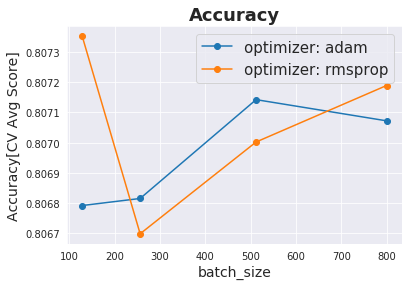

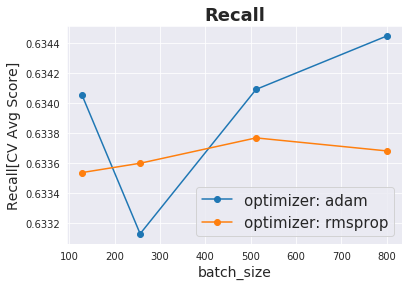

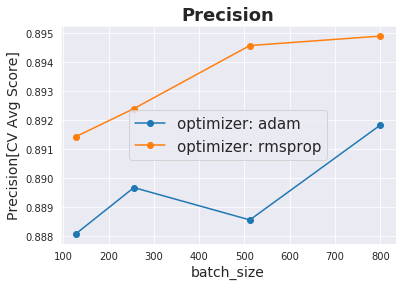

In [17]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Precision')


In [18]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list

In [19]:
index= return_index_list(params['batch_size'], params['optimizer'])

df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                    'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

writer = pd.ExcelWriter('Neural_Network.xlsx')
df.to_excel(writer, 'Neural_Network')
writer.save()
writer.close()

In [20]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[128, adam]",0.806792,0.888063,0.634050,0.001303
"[128, rmsprop]",0.807352,0.891423,0.633536,0.001723
"[256, adam]",0.806815,0.889660,0.633127,0.001326
"[256, rmsprop]",0.806699,0.892390,0.633598,0.001069
"[512, adam]",0.807142,0.888543,0.634091,0.001466
"[512, rmsprop]",0.807002,0.894570,0.633767,0.001606
"[800, adam]",0.807072,0.891820,0.634447,0.001349
"[800, rmsprop]",0.807189,0.894897,0.633680,0.001606


In [ ]:
## check for overfiting
model_ov= create_model("adam")
history= model_ov.fit(x=X_train, y=Y_train, epochs=300, batch_size=800, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])


Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 2s 37us/sample - loss: 0.6585 - accuracy: 0.6182 - val_loss: 0.5760 - val_accuracy: 0.7327
Epoch 2/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.5826 - accuracy: 0.7261 - val_loss: 0.5364 - val_accuracy: 0.7396
Epoch 3/300
42845/42845 [==============================] - 1s 26us/sample - loss: 0.5464 - accuracy: 0.7480 - val_loss: 0.4975 - val_accuracy: 0.7763
Epoch 4/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.5127 - accuracy: 0.7721 - val_loss: 0.4671 - val_accuracy: 0.8009
Epoch 5/300
42845/42845 [==============================] - 1s 19us/sample - loss: 0.4897 - accuracy: 0.7876 - val_loss: 0.4525 - val_accuracy: 0.8009
Epoch 6/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.4741 - accuracy: 0.7958 - val_loss: 0.4437 - val_accuracy: 0.8009
Epoch 7/300
42845/42845 [=========================

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4220 - accuracy: 0.8063 - val_loss: 0.4245 - val_accuracy: 0.8009
Epoch 56/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4212 - accuracy: 0.8066 - val_loss: 0.4246 - val_accuracy: 0.8009
Epoch 57/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4211 - accuracy: 0.8063 - val_loss: 0.4244 - val_accuracy: 0.8009
Epoch 58/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4221 - accuracy: 0.8061 - val_loss: 0.4243 - val_accuracy: 0.8009
Epoch 59/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4214 - accuracy: 0.8061 - val_loss: 0.4241 - val_accuracy: 0.8009
Epoch 60/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4216 - accuracy: 0.8062 - val_loss: 0.4243 - val_accuracy: 0.8009
Epoch 61/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4208 - accuracy: 0.8065 - v

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4184 - accuracy: 0.8073 - val_loss: 0.4235 - val_accuracy: 0.8007
Epoch 110/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4180 - accuracy: 0.8070 - val_loss: 0.4232 - val_accuracy: 0.8009
Epoch 111/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4186 - accuracy: 0.8062 - val_loss: 0.4230 - val_accuracy: 0.8009
Epoch 112/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4186 - accuracy: 0.8067 - val_loss: 0.4230 - val_accuracy: 0.8010
Epoch 113/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4186 - accuracy: 0.8064 - val_loss: 0.4235 - val_accuracy: 0.8008
Epoch 114/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4184 - accuracy: 0.8065 - val_loss: 0.4232 - val_accuracy: 0.8008
Epoch 115/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.4185 - accuracy: 0.807

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4162 - accuracy: 0.8066 - val_loss: 0.4210 - val_accuracy: 0.8010
Epoch 164/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4167 - accuracy: 0.8062 - val_loss: 0.4208 - val_accuracy: 0.8006
Epoch 165/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4173 - accuracy: 0.8065 - val_loss: 0.4213 - val_accuracy: 0.8007
Epoch 166/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4159 - accuracy: 0.8067 - val_loss: 0.4202 - val_accuracy: 0.8008
Epoch 167/300
42845/42845 [==============================] - 1s 28us/sample - loss: 0.4166 - accuracy: 0.8069 - val_loss: 0.4203 - val_accuracy: 0.8007
Epoch 168/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4168 - accuracy: 0.8065 - val_loss: 0.4216 - val_accuracy: 0.8007
Epoch 169/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4169 - accuracy: 0

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4155 - accuracy: 0.8074 - val_loss: 0.4194 - val_accuracy: 0.8006
Epoch 218/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4152 - accuracy: 0.8068 - val_loss: 0.4194 - val_accuracy: 0.8009
Epoch 219/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4152 - accuracy: 0.8065 - val_loss: 0.4190 - val_accuracy: 0.8008
Epoch 220/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4152 - accuracy: 0.8068 - val_loss: 0.4201 - val_accuracy: 0.8008
Epoch 221/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4153 - accuracy: 0.8068 - val_loss: 0.4195 - val_accuracy: 0.8009
Epoch 222/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4153 - accuracy: 0.8063 - val_loss: 0.4202 - val_accuracy: 0.8011
Epoch 223/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4159 - accuracy: 0.806

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4140 - accuracy: 0.8067 - val_loss: 0.4191 - val_accuracy: 0.8012
Epoch 272/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4137 - accuracy: 0.8066 - val_loss: 0.4174 - val_accuracy: 0.8012
Epoch 273/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4147 - accuracy: 0.8069 - val_loss: 0.4177 - val_accuracy: 0.8009
Epoch 274/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4137 - accuracy: 0.8077 - val_loss: 0.4180 - val_accuracy: 0.8009
Epoch 275/300
42845/42845 [==============================] - 0s 7us/sample - loss: 0.4142 - accuracy: 0.8066 - val_loss: 0.4186 - val_accuracy: 0.8009
Epoch 276/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4139 - accuracy: 0.8065 - val_loss: 0.4177 - val_accuracy: 0.8008
Epoch 277/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4138 - accuracy: 0.8072

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
_, ax = plt.subplots(1,1)
ax.set_ylim([0.32,0.8])
ax.plot(epoch_count, training_loss, 'r-')
ax.plot(epoch_count, test_loss, 'b-')

ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(['Training Loss', 'Test Loss'], fontsize=14)
ax.grid('on')
